# Project Python Foundations: FoodHub Data Analysis - Shashank Tilwalli

**Marks: 60**

### Context

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import warnings

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [ ]:
# The following code mounts the google drive. This is only for Colalb
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data Project#1-FoodHub
df = pd.read_csv('/content/drive/MyDrive/AIML Course/Project#1-FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations: In this dataset  there are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
#### Observations:
There are about 1898 rows & 9 Columns. Out of this all the given colums are not-null which implies that there are no missing values in the dataframe. The integer columns in this dataframe are order_id, customer_id, food_preparation_time & delivery time. The restaurant_name, cuisine_type, item_name, and order_date are objects or string and unit_price & total_price are floats.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})
#or
df.isnull().any()

order_id                 False
customer_id              False
restaurant_name          False
cuisine_type             False
cost_of_the_order        False
day_of_the_week          False
rating                   False
food_preparation_time    False
delivery_time            False
dtype: bool

#### Observations:
There cannot be any missing values since the data type of all the columns is non-null. However if one needs to find the missing values, they can run the above code. The above code shoul give the count and the %age of missing rows. In our case its returning null/blank which was expected.

However there is a rating column which has value of "Not rated". This is very subjective how one tries to treat this. I am leaving this as as since I am interpreting this as users have decided not to provide any rating!  

In [ ]:
#Treating 'Not Given' with appropriate method
#old = 'Not given'
#new = 0

# Replace 'apple' with 'orange' in 'col1'
#df['rating'] = df['rating'].replace(old, new)
#df['rating'] = df['rating'].astype(int)
#df.head()

Observation:

One can run the above to convert all not rated to -1 and converting it to integer column. Converting to Integar would generate better analysis.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.500,548.050,1476547.00,1477021.25,1477495.50,1477969.750,1478444.00
customer_id,1898.0,171168.478,113698.140,1311.00,77787.75,128600.00,270525.000,405334.00
cost_of_the_order,1898.0,16.499,7.484,4.47,12.08,14.14,22.298,35.41
food_preparation_time,1898.0,27.372,4.632,20.00,23.00,27.00,31.000,35.00
delivery_time,1898.0,24.162,4.973,15.00,20.00,25.00,28.000,33.00


Observations

Cost of the Order: On an average the cost of the order is between  17, and half of the orders are priced less than 15. 75% of the orders are priced at 22$ where are the max is 35%. So there is a slight possibility of some outliers.

Food Prep Time - On an average it takes about less than 30 minutes to make the order. 75% of the orders are delivered < 30 minutes

Delivery Time - On an average in takes about 25 minutes to deliver. This also implies on an average from placing and order to delivery is done within an hour. Also max time it has taken for delivering is about 33 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df[df['rating']=='Not given'].shape[0]

736

#### Observations:
Out of 1898 orders, there are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
print ("Unique Cusine Type: ", df['cuisine_type'].nunique())
print ("Unique Customers: ", df['customer_id'].nunique())
print ("Unique Resturant Name: ", df['restaurant_name'].nunique())
print ("Day of the weeek: ", df['day_of_the_week'].nunique())

Unique Cusine Type:  14
Unique Customers:  1200
Unique Resturant Name:  178
Day of the weeek:  2


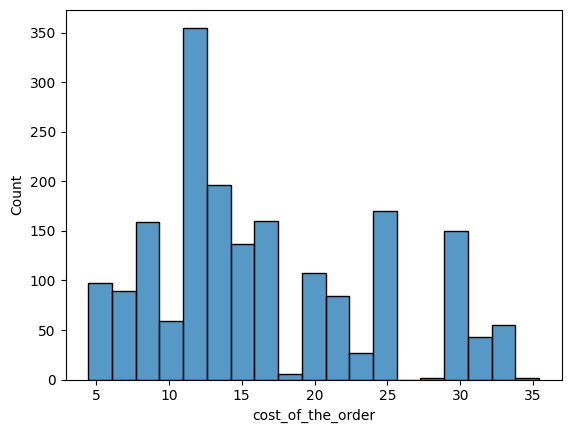

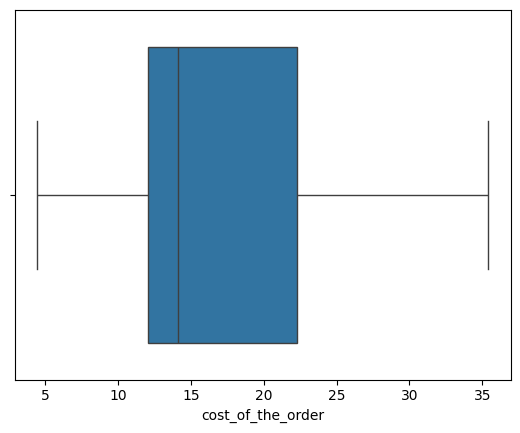

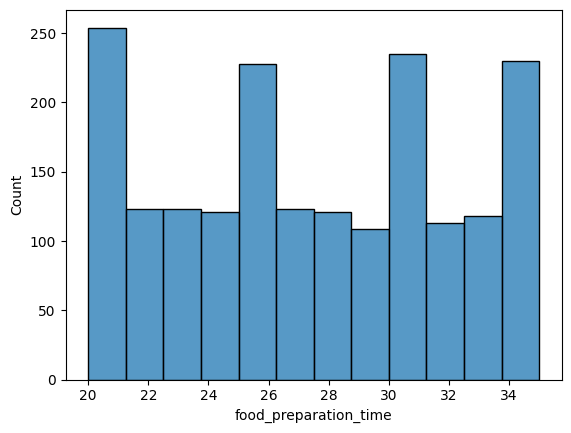

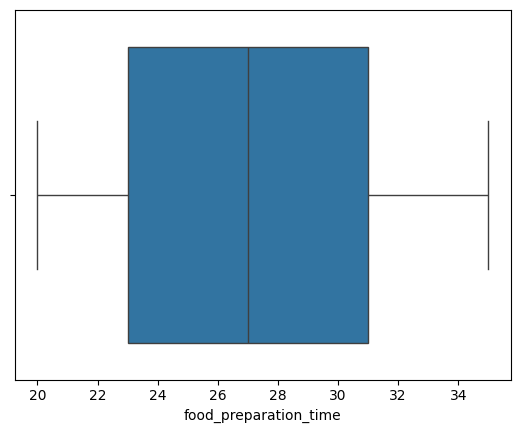

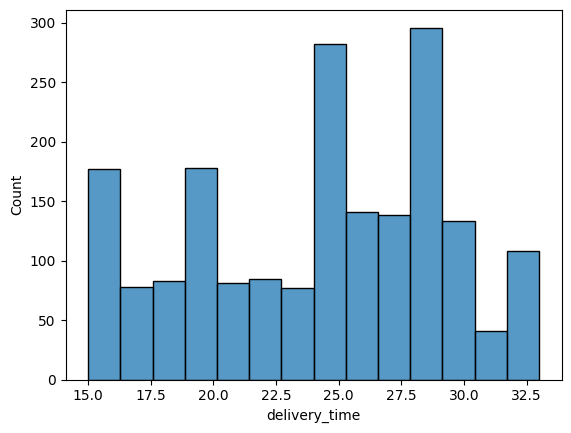

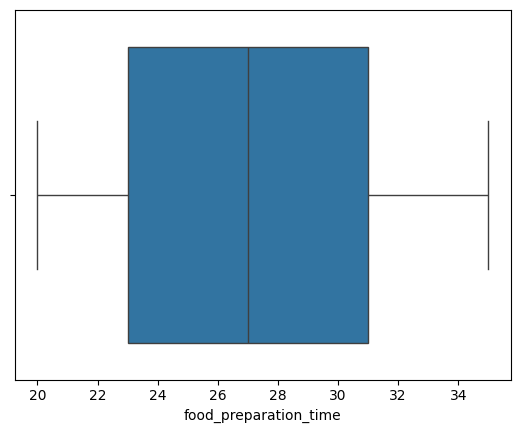

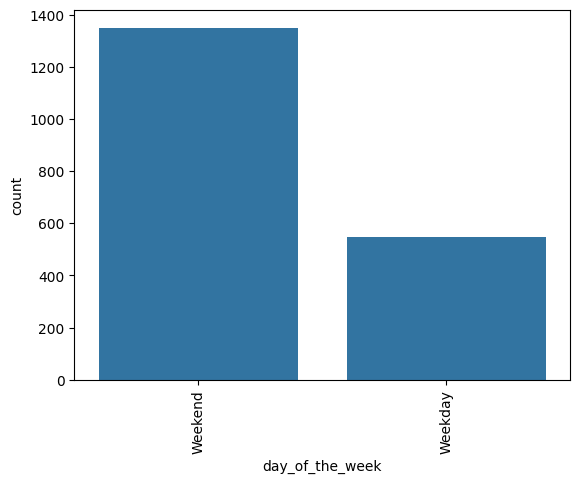

In [ ]:
sns.histplot(df["cost_of_the_order"])
plt.show()
sns.boxplot(data=df['cost_of_the_order'], orient="h")
plt.show()

sns.histplot(df["food_preparation_time"])
plt.show()
sns.boxplot(data=df['food_preparation_time'], orient="h")
plt.show()

sns.histplot(df["delivery_time"])
plt.show()
sns.boxplot(data=df['food_preparation_time'], orient="h")
plt.show()

sns.countplot(df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

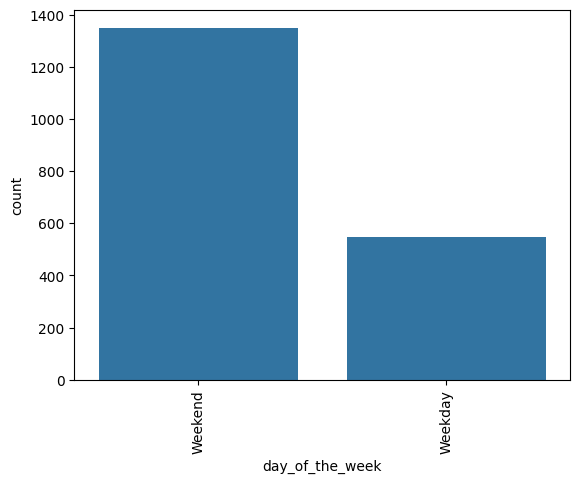

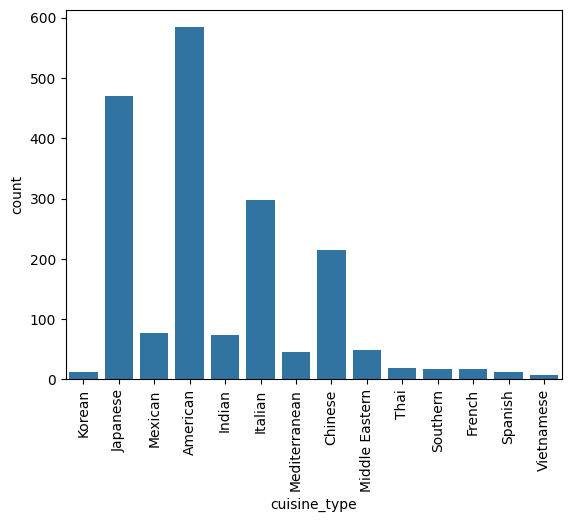

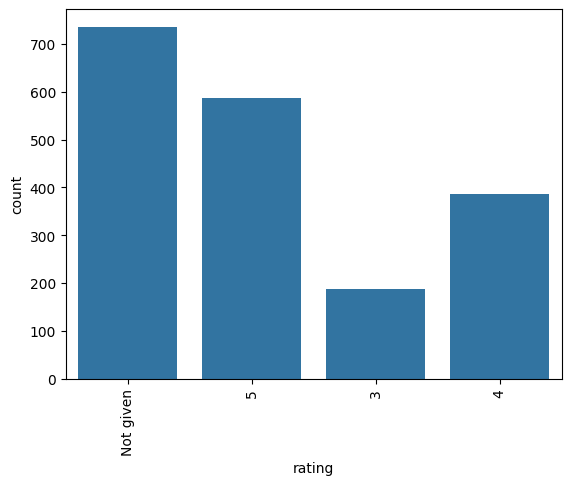

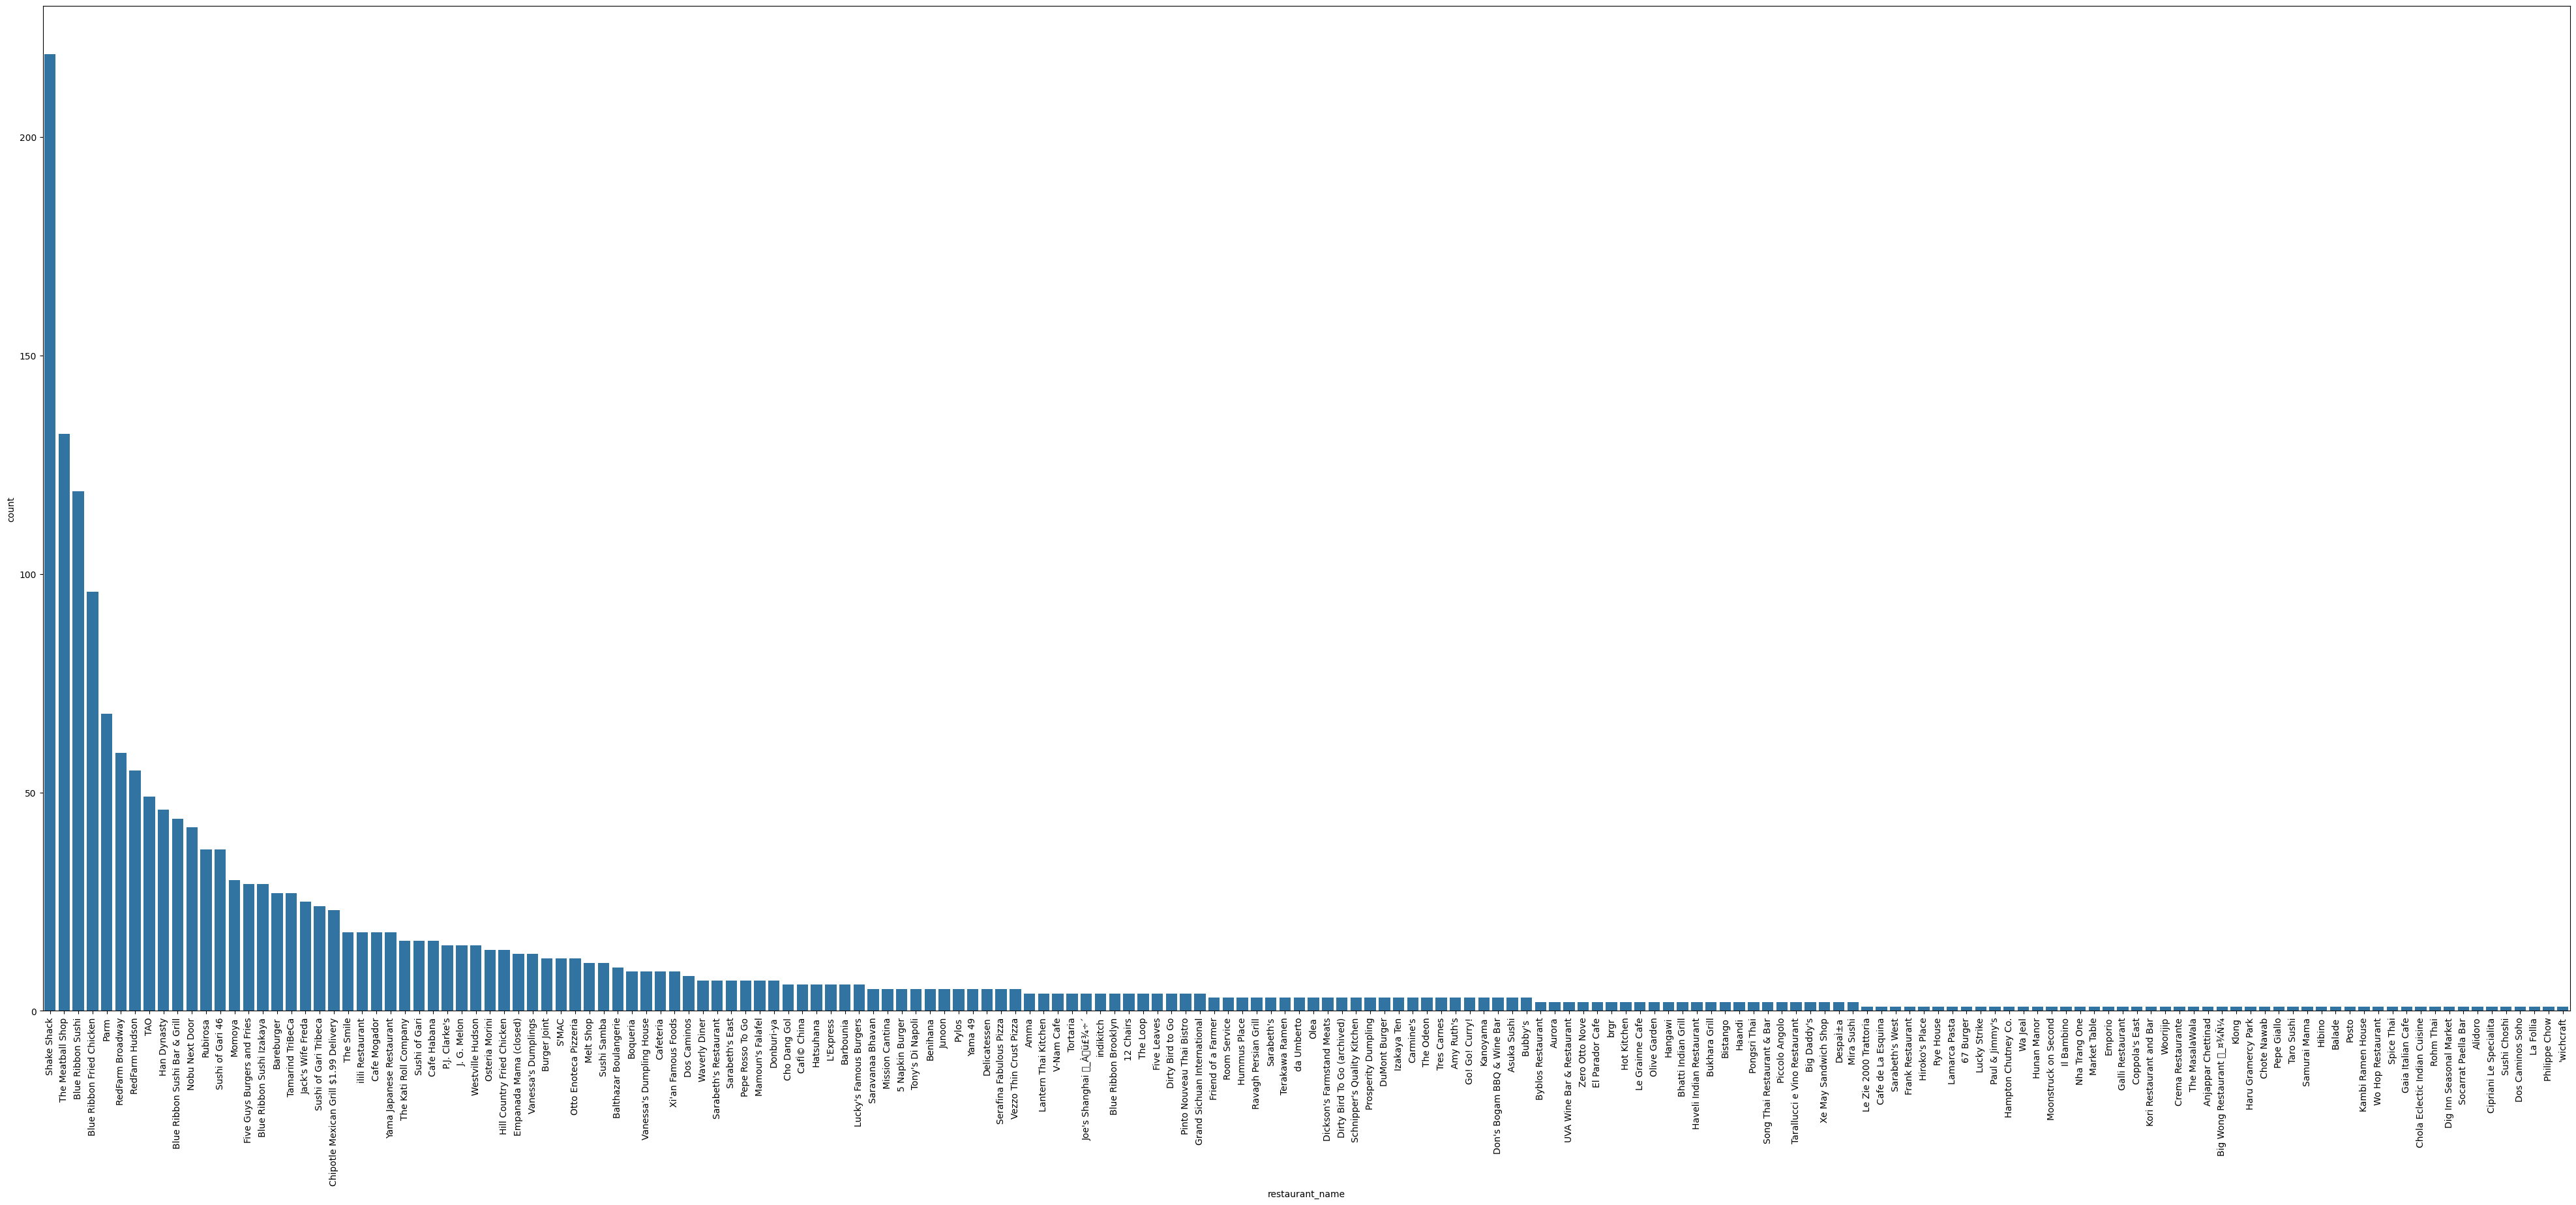

In [ ]:
sns.countplot(df,x='day_of_the_week');
plt.xticks(rotation=90)
plt.show()

sns.countplot(df,x='cuisine_type');
plt.xticks(rotation=90)
plt.show()

sns.countplot(df,x='rating');
plt.xticks(rotation=90);
plt.show()

plt.figure(figsize=(50,20))
sns.countplot(df,x='restaurant_name', order=df["restaurant_name"].value_counts().index);
plt.xticks(rotation=90)
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
grouped_df = df.groupby(by='restaurant_name')['order_id'].count().sort_values(ascending=False)
grouped_df.head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:
The top 5 resturants are Shake shack, The meatball shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken & Parm. The same can be confirmed with the count plot.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# Count the number of occurrences of each unique value in the column
popular_cuisine_weekend = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()
popular_cuisine_weekend

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
The most popular cuisine on weekend is American with 415 orders followed by Japanese at 335

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
percentage = (df["cost_of_the_order"] > 20).mean() * 100

# Print the result
print(f"{percentage:.2f}% of orders cost more than 20 dollars.")

29.24% of orders cost more than 20 dollars.


#### Observations:
About 30%(Exact - 29.24%) of orders of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
mean_delivery_time = round(df["delivery_time"].mean(), 2)
print(f"The mean mean order delivery time {mean_delivery_time} minutes")

The mean mean order delivery time 24.16 minutes


#### Observations:
The mean mean order delivery time 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
#df['customer_id'].value_counts().head(3)
top_3_customers = df.groupby("customer_id")["order_id"].count().sort_values(ascending=False).head(3)
top_3_customers

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations:
The Customer ID's of top 3 customers are 52832, 47440, 83287. The number of orders by each one of this is 13, 10 & 9 respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


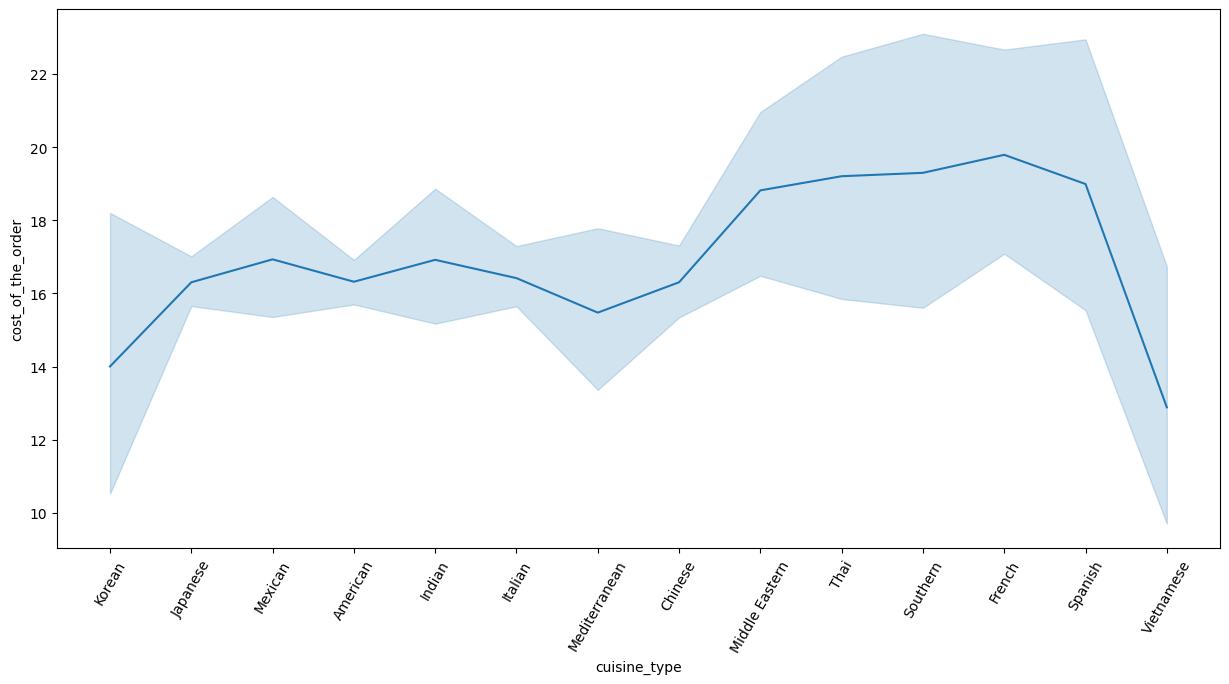

In [ ]:
# Write the code here
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.lineplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()

Observation
Middle Eastern, Thai, Southern & Spanish form the highest cost where is Vietnamese is the cheapest

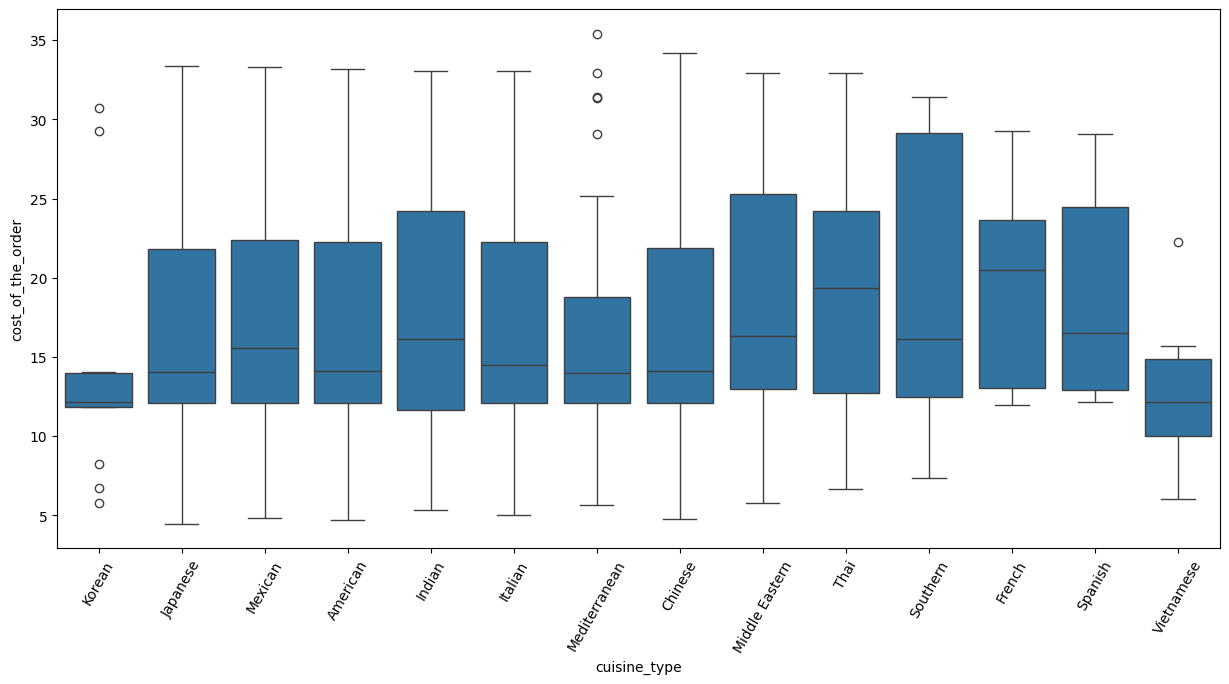

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()

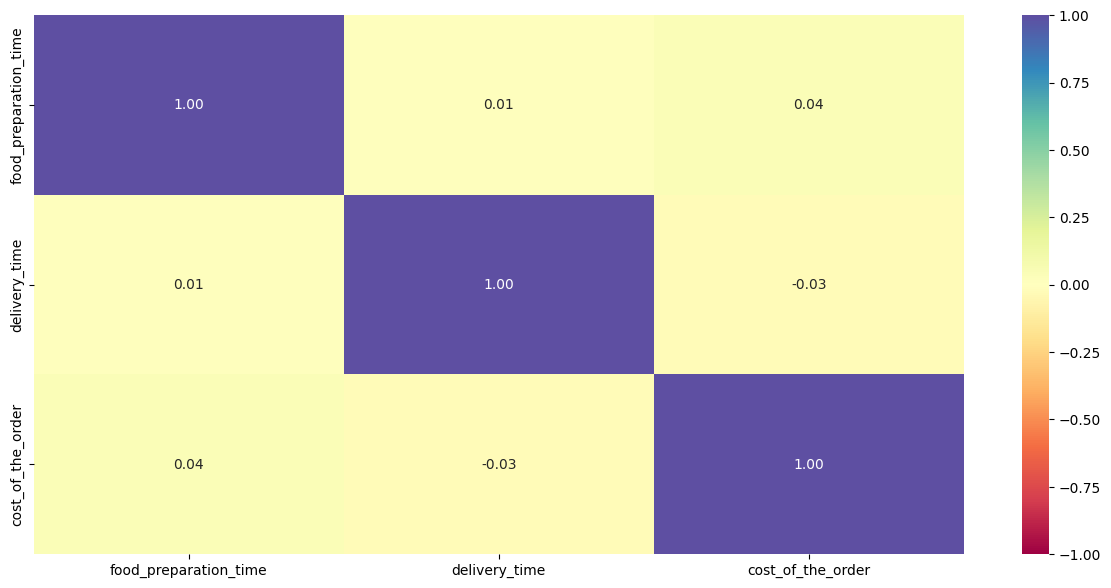

In [ ]:
num_var = ['food_preparation_time','delivery_time','cost_of_the_order']
corr = df[num_var].corr()
# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

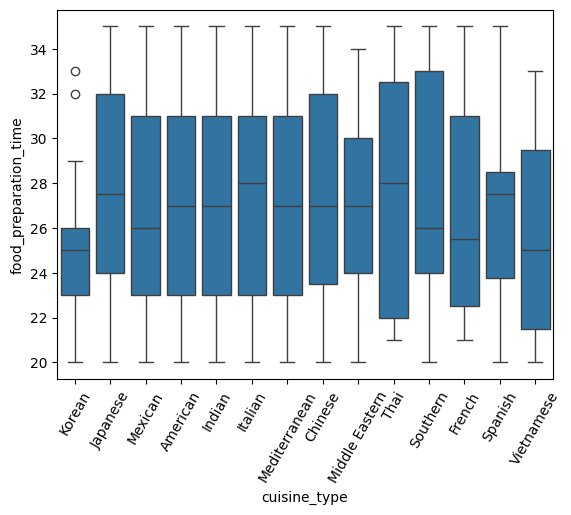

In [ ]:
# Relationship between cuisine type and food prep time
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 60)
plt.show()

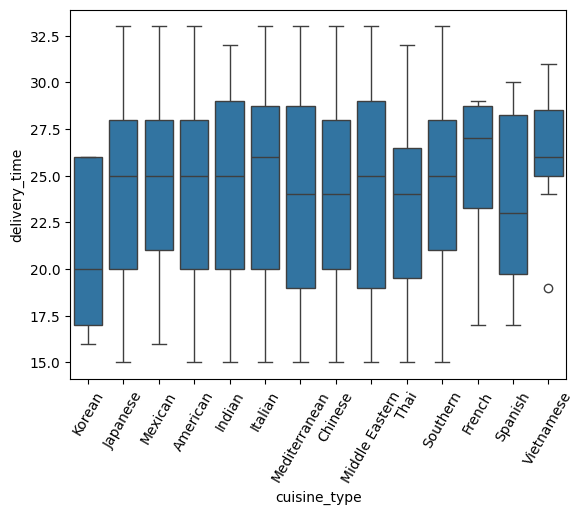

In [ ]:
# Relationship between cuisine type and delivery_time
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = df)
plt.xticks(rotation = 60)
plt.show()

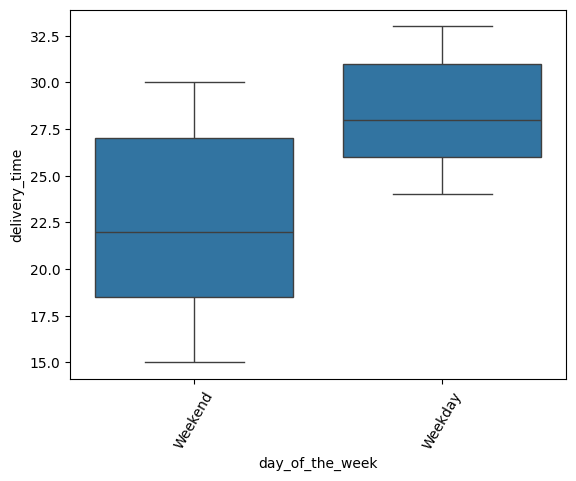

In [ ]:
# Relationship between cuisine type and delivery_time
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.xticks(rotation = 60)
plt.show()

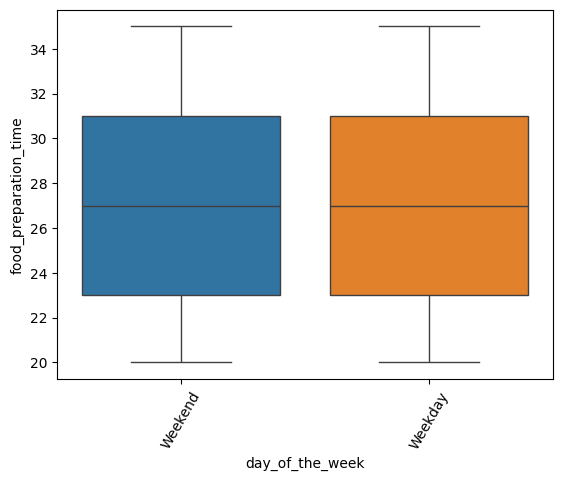

In [ ]:
# Relationship between food_preparation_time type and day_of_the_week
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = df, hue="day_of_the_week")
plt.xticks(rotation = 60)
plt.show()

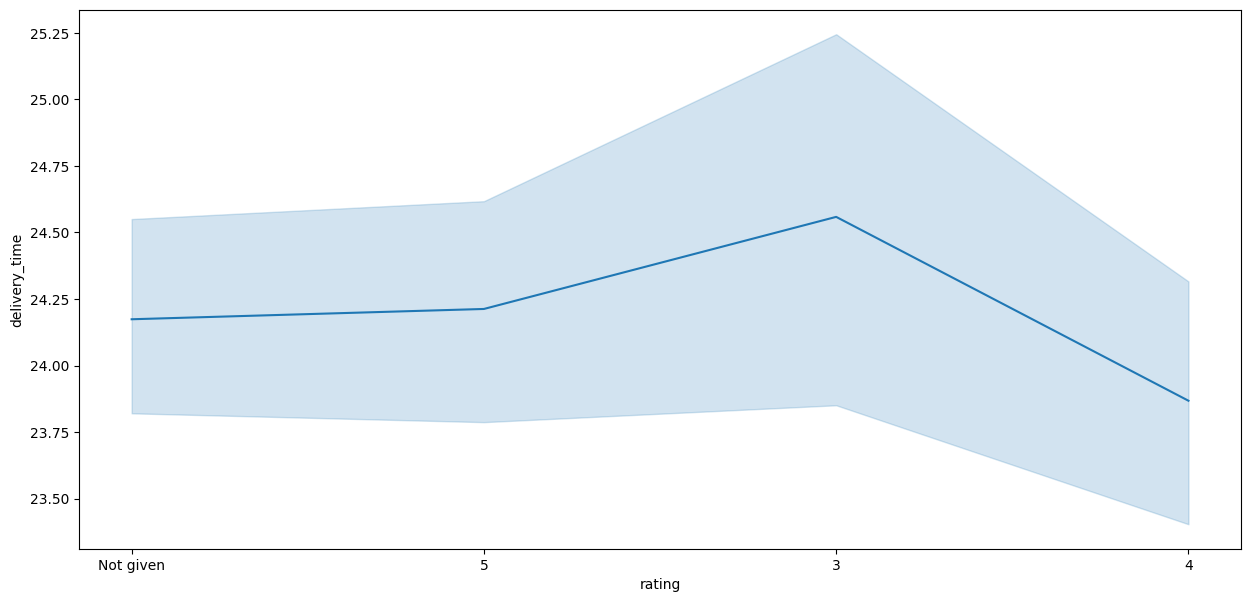

In [ ]:
# Relation between rating and delivery time
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

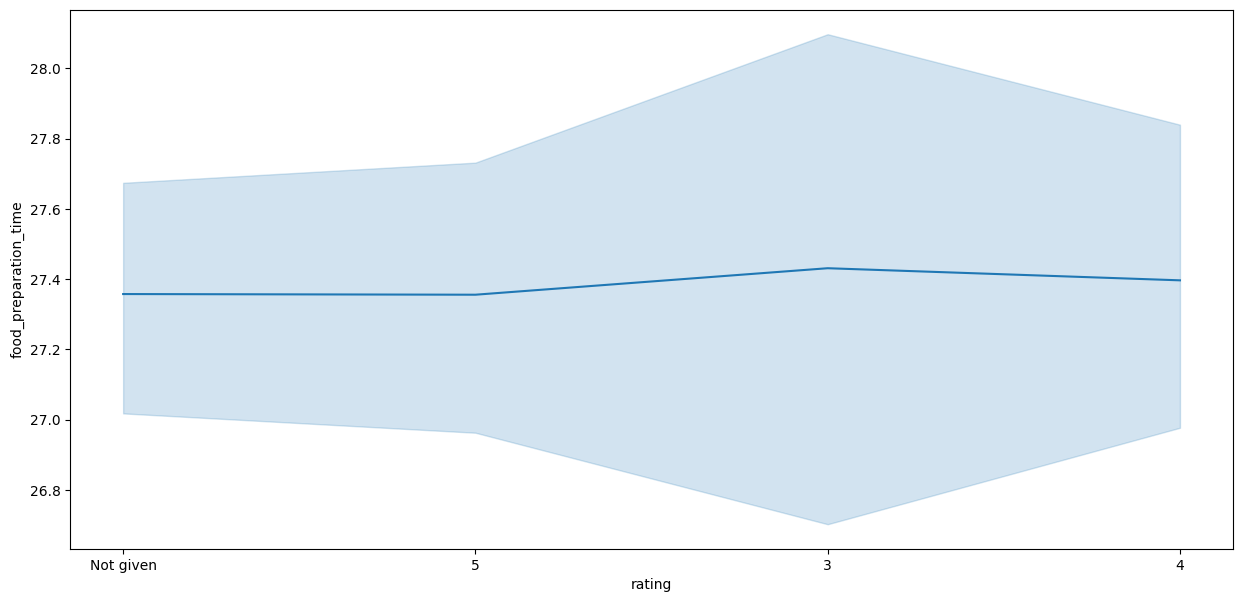

In [ ]:
# Relation between rating and prep time
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

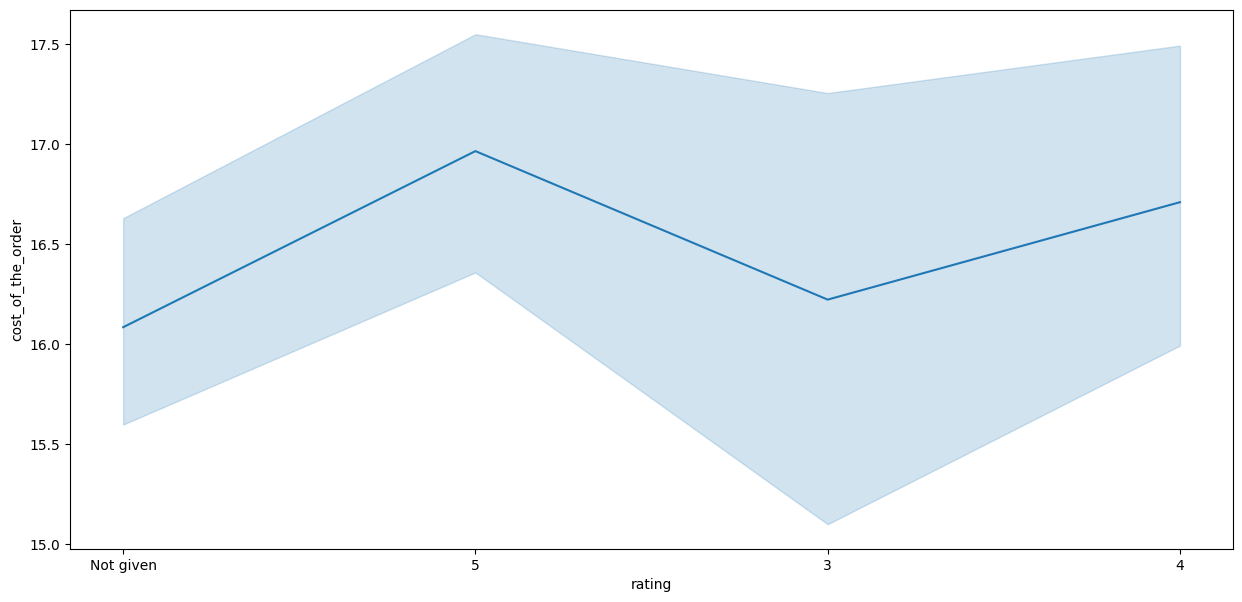

In [ ]:
# Relation between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
#df.info()
df_rated_restaurants = df[df['rating'] != 'Not given']
df_rated_restaurants['rating'] = df_rated_restaurants['rating'].astype('int')
df_rating_count = df_rated_restaurants.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
resturant_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
df_rest_avg_rat_4 = df_rated_restaurants[df_rated_restaurants['restaurant_name'].isin(resturant_names)].copy()
df_rest_avg_rat_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()



,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
The resturants full filling the criteria for rating count more than 50 and average rating of 4 are Meatball shop, blue Ribbon, Shake Shack & Blue Ribbon Sushi


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
def function_calculate_revenue(x):
    if x <= 5:
        return x * 0
    elif x <= 20:
        return x * 0.15
    else:
        return x * 0.25

df['rev'] = df['cost_of_the_order'].apply(function_calculate_revenue)
#df.info()
#df.head()
total_revenue = df["rev"].sum()
total_revenue


6166.303

#### Observations:
The total revenue generated is $6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#df.info()
# Write the code here
# Calculate the total time for each order
df["total_time"] = df["delivery_time"] + df["food_preparation_time"]
# Count the number of orders that took more than 60 minutes
over_60_minutes = df[df["total_time"] > 60].shape[0]
# Calculate the percentage of orders that took more than 60 minutes
percentage = round(over_60_minutes / df.shape[0] * 100, 2)

# Print the percentage
print(percentage)

10.54


#### Observations:
About 10-11% of the orders takes more than 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
weekday_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
round(weekday_delivery_time, 2)


28.34

#### Observations:
The average weekday devliery time is 28 minutes

In [ ]:
weekend_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
round(weekend_delivery_time, 2)


22.47

Observations:

The average weekend devliery time is 22 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* It does not matter if it is weekday or weekend. The most popular cusine is American.
* The average delivery time over the weekday seems to be higher
* The rating appears to reduce if the delivery time is more. The rating does not get affected for the cost of the order or the preparation time.


### Recommendations:

* There is more demand for American cusine and less demand for Korean, spanish & Vieatnamese.
* The rating is reduced only when the delivery time is more. The delivery time can either be due to traffic. In any case one of the recommendation is to look for partners within the vicinty of customers to reduce the delivery time or improve our delivery fleet.
* The entire analysis is based on about 1900 orders. We would need to get more data to better understand and optimize our fleet


In [ ]:
!jupyter nbconvert --to html /content/PYF_Project_LearnerNotebook_FullCode_Shashank.ipynb

[NbConvertApp] Converting notebook /content/PYF_Project_LearnerNotebook_FullCode_Shashank.ipynb to html
[NbConvertApp] Writing 1848477 bytes to /content/PYF_Project_LearnerNotebook_FullCode_Shashank.html


---